# Mimiching ```sklearn``` using our own python code

In this we will be implementing our own python code. We will perform nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this is to help us:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets # import datasets
import numpy as np # import numpy
import matplotlib.pyplot as plt # import plots
import pandas as pd

# set the seed for the random number generator
mySeed=1234567

# load data
iris = datasets.load_iris() # load data 
X = iris.data # get features
y = iris.target # get targets
#print(iris.DESCR) # print dataset description

In [6]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## 1. Exploratory Data Analysis [6 pts]

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at-hand. The code below loads the iris dataset for you. With only 4 features (sepal length, sepal width, petal length, and petal width), and 3 classes, it is possible to use scatter plots to visualise interactions between different pairings of features. An example of how this visualisation might look is shown below:

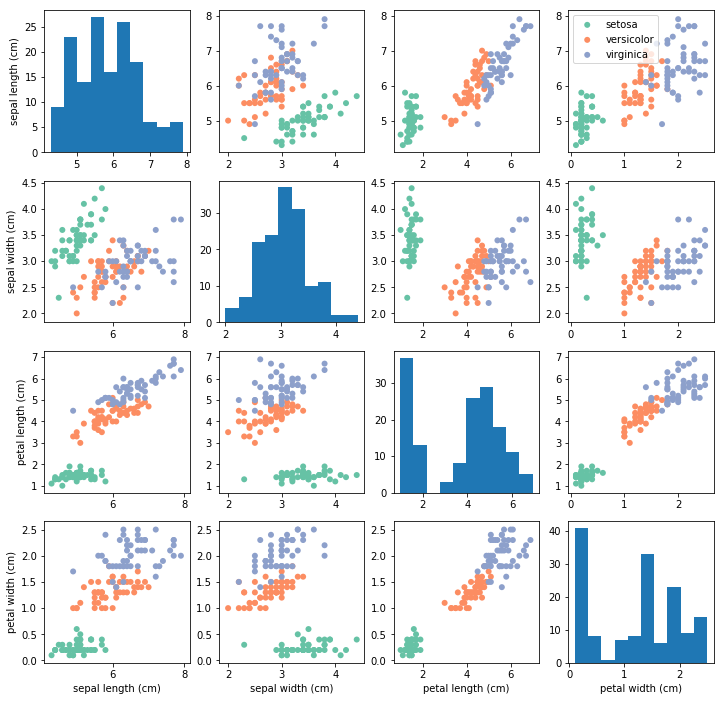

The first task is to recreate this 4x4 grid, with each off-diagonal subplot showing the interaction between two features, with each of the three classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a histogram on that feature.     

We should create a function that, given data X and labels y, plots this 4x4 grid.  The function should be invoked as,
        
    myplotGrid(X,y)
    
where X is your training data and y are the labels. (There are libraries available that do this for us: e.g. pandas' pd.plotting.scatter_matrix, or seaborn, however here we want you to implement your own version).

#### Answer:

In [16]:
# define plotting function


def myplotGrid(X, y, feat_names):
    """Produces a grid of scatter plots between 
    all the classes' combinations.

    Parameters
    ----------
    X: numpy array
        The values of the features.
    
    y: numpy array
        The values of the classes
    
    feat_names: numpy array
        The features column names
        
    Returns
    --------
    matplotlib.figure
        A grid of scatter plots.
    """
    # We identify unique classes

    
    # We difine the size of the grid of plots
    n = len(np.unique(y))+1
    
    # We make the size of the figure parametrisable 
    x = 12 - n
    figlenght = fighight = x + n
    fig, ax = plt.subplots(n, n, figsize=(figlenght, fighight))
    
    # We itterate through the grid and produce either histograms of scatterplots
    for indx, feat_clmn in enumerate(range(n)):
        for feat_row in range(n):
            if feat_clmn == feat_row:
                ax[feat_clmn, feat_row].hist(X[:, feat_row])
                ax[feat_clmn, feat_row].set(ylabel=feat_names[indx])
                ax[feat_clmn, feat_row].set(xlabel=feat_names[feat_row])
                
                ax[feat_clmn, feat_row].label_outer()

            
            else:
                scatt = ax[feat_clmn, feat_row].scatter(X[:, feat_row], X[:, feat_clmn], c=y)
                
                ax[feat_clmn, feat_row].set(ylabel=feat_names[indx])
                ax[feat_clmn, feat_row].set(xlabel=feat_names[feat_row])
                
                legend1 = ax[feat_clmn, feat_row].legend(*scatt.legend_elements(),title="Classes")
                ax[feat_clmn, feat_row].add_artist(legend1)

                ax[feat_clmn, feat_row].label_outer()


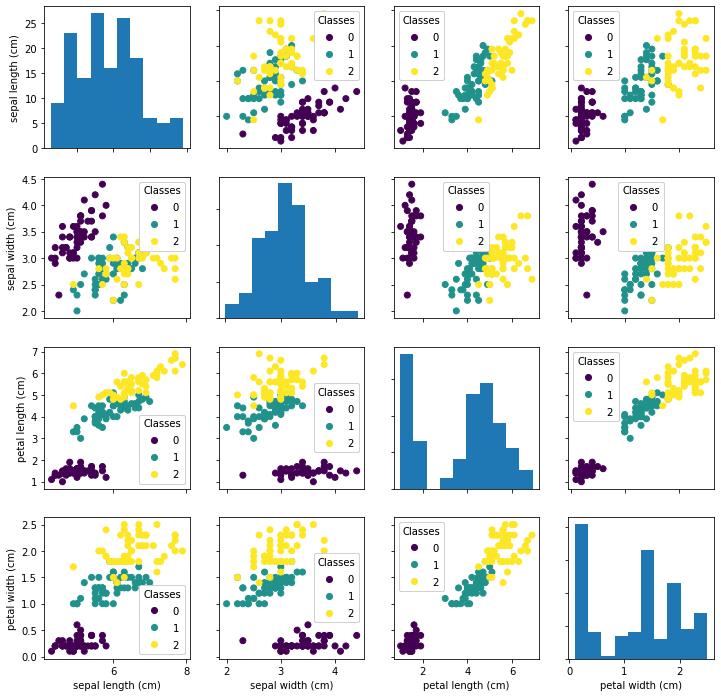

In [17]:
# run the plotting function

myplotGrid(X, y, iris.feature_names)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

We perturb our data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

In [14]:
# noise code 
# initialise random seed to replicate results over different runs

np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.5,X.shape)

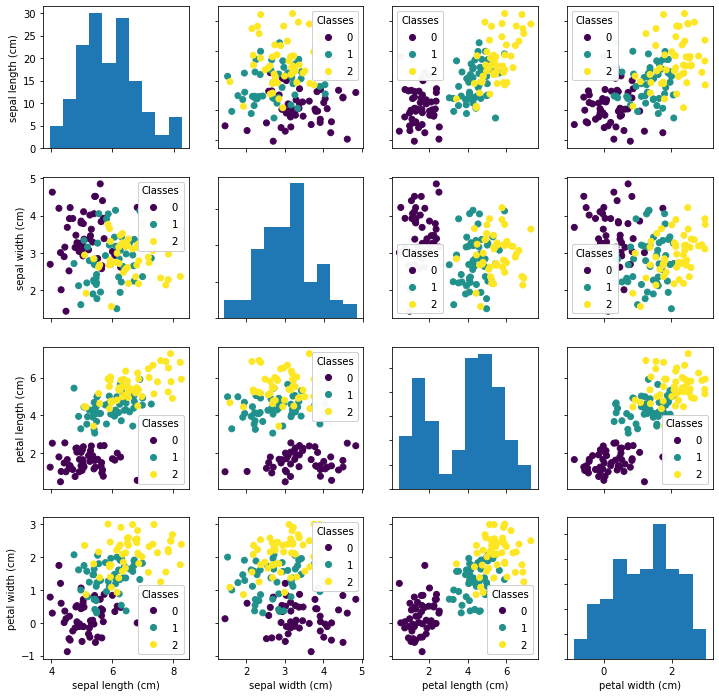

In [18]:
myplotGrid(XN,y, iris.feature_names)

## 2. Implementing kNN [6 pts]

In the cell below, we develop our own code for performing k-Nearest Neighbour classification.  We may use the scikit-learn k-NN implementation a guide - and as a way of verifying our results - but it is important that our implementation does not use any libraries other than the basic numpy and matplotlib functions. 

We define a function that performs k-NN given a set of data. Our function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is our training data, y is our training outputs, X\_ are our testing data and y\_ are our predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how we choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


#### Answer:

## Object Oriented implementation

In the following section we will be developing an object oriented implementation of the K nearest neighbours algorithm. Therefore classes, methods and attributes used in this notebook will be presented as a whole in this area and for the convenience of the reader, a ```help()``` will be called when a method is used so that the corresponding piece of code can be referenced and reviewed. This way we will avoid repetition of blocks of code along the notebook.

Our implementation contains methods and attributes that can be used individually and offer multiple functionalities to our KNN object. More specifically, MyKNN class consist of the following methods:

#### ```neighbours_euclidean```

This method is making use of the euclidean distance definition $d(x,y) = \sqrt{ \sum_{i=1}^n (x_i-y_i)^2}$ to calculate a requested number of nearest neighbours of a point.

#### ```neighbours_manhattan```

Respectively, this method is using the manhattan distance $d(x,y) =  \sum_{i=1}^n |x_i-y_i|$ to return the closest arrays to the point of interest.

#### ```single_prediction```

This method uses either the euclidean or manhattan distance functions to predict the class of a single point of interest.


#### ```k_nearest_neighbors``` 

This method lays at the core of MyKNN and uses all the previous methods to offer predictions for a set of points of interest.


#### ``` conf_matrix```

This is a method that produces a confusion matrix per class to evaluate the results of the preformance of a model.


#### ```report```

This method is making use of the _true positive, true negative, false positive_ and _false negative_ definitions  and produces a report with the precision, recall and f-1 score per class. This way we can evaluate the performance of our agorithm.

#### ```accuracy```

This method calculates the overall accuracy of our algorithm's outputs.

In [4]:
# mykNN code

class MyKNN:
    
    """ An object to implement K Nearest Neighbours algorithm.
    
    ...
    
    Attributes
    -----------
    n_neighbors : int
        defines the number of neighbours to be used in KNN (default = 3).

    metric : str
        Defines the distance metric to be used by KNN (default = 'euclidean').

        
    Methods
    -------
    neighbors_euclidean(train, test_row)
        Identifies the requested number of nearest neigbours between a given array
        and a set of arrays, using euclidean distance.
    
    neighbors_manhattan(train, test_row)
        Calculates the requested number of nearest neigbours between a given array (data point)
        and a set of arrays, using manhattan distance.
    
    single_prediction(self, train, train_classes, test_row)
        Predicts the class of a singe array (data point).
        
    k_nearest_neighbors(self, train, train_classes, test)
        Predicts the classes of a set of arrays (data points).
    
    conf_matrix(actual, predicted)
        Produces a confusion matrix.
       
    """
    
    def __init__(self, n_neighbors = None, metric = None):
        
        """
        
        Parameters
        -----------
        n_neighbors : int
            Defines the number of neighbors to be used in KNN (default = 3).

        metric : str
            Defines the distance metric to be used by KNN (default = 'euclidean').


        """
        
        self.n_neighbors = n_neighbors # Initialise the knn object and define the number of neighbors
        if self.n_neighbors is None:
            self.n_neighbors = 3
        
        self.metric = metric # Initialise the knn object and define the distance metric
        if self.metric is None:
            self.metric = 'euclidean'
        elif self.metric == 'manhattan':
            self.metric = 'manhattan'

        

    def neighbors_euclidean(self, train, test_row):
        
        
        """Identifies the requested number of nearest neigbours between a given array
        and a set of arrays, using euclidean distance.
        
        Parameters
        ----------
        train: numpy array
            Contains the data points to be used by the KNN algorithm for training.
            
        test_row: numpy array
            The data point to calculate the nearest neighbors for.
        
        Returns
        --------
        neighbors: list
            
            A list of the requested nearest neighbors.
        """
        distances = [] # Initiating a list to store the distances
        for train_row in train:  # Calculating all the distances between the selected vector and the rest
            # Euclidean distance is l2 norm and the default value of ord parameter in numpy.linalg.norm is 2.
            dist = np.linalg.norm(np.array(test_row) - np.array(train_row)) 
            distances.append((train_row, dist))
        distances.sort(key = lambda t: t[1]) # Sorting by the second element of the tuple (distance)
        self.neighbors = []
        for i in range(self.n_neighbors):  # Selecting the n nearest neighbors
            self.neighbors.append(distances[i][0])
        return self.neighbors
    
    def neighbors_manhattan(self, train, test_row):
        
        """Identifies the requested number of nearest neigbors between a given array
        and a set of arrays, using manhattan distance.
        
        Parameters
        ----------
        train: numpy array
            Contains the data points to be used by the KNN algorithm for training.
            
        test_row: numpy array
            The data point to calculate the nearest neighbors for.
        
        Returns
        --------
        neighbors: list
            
            A list of the requested nearest neighbors.
        """
        # Similarly to the euclidean distance:
        distances = []
        for train_row in train:
            dist = np.abs(np.array(test_row) - np.array(train_row)).sum(-1)
            distances.append((train_row, dist))
        distances.sort(key = lambda tup: tup[1])
        self.neighbors = []
        for i in range(self.n_neighbors):
            self.neighbors.append(distances[i][0])
        return self.neighbors
    
    def single_prediction(self, train, train_classes, test_row):
        
                
        """Predicts the class of a singe array (data point).
        
        Parameters
        ----------
        train: numpy array
            Contains the data points to be used by the KNN algorithm for training.
            
        train_classes: numpy array
            The classes corresponding to train data.
        
        test_row: numpy array
            The point to make prediction for.
        
        Returns
        --------
        prediction: int
            
            The value of the class predicted.
        """
        
        data_and_classes = np.column_stack((train, train_classes)) # Merging the data with their respective classes
        
        if (self.metric is None or self.metric == 'euclidean'):
            neighbors = self.neighbors_euclidean(train, test_row) # Selecting the nearest neighbors
            output_values = ([data_and_classes[np.all(data_and_classes[:, : -1] == features_value, axis=1),
                                           :][0][-1] for features_value in neighbors])
            
            # We predict the class of the selected data point by assigning the class most
            # Frequently occured among the neighbors
            self.prediction = max(set(output_values), key=output_values.count) 
        
        # If manhattan is selected in the initiation of knn the following distance will be used
        elif self.metric == 'manhattan':
            neighbors = self.neighbors_manhattan(train, test_row) 
            output_values = ([data_and_classes[np.all(data_and_classes[:, : -1] == features_value, axis=1),
                                           :][0][-1] for features_value in neighbors])
            self.prediction = max(set(output_values), key=output_values.count)        
        return self.prediction
    
    
    
    def k_nearest_neighbors(self, train, train_classes, test):
        
        """Predicts the classes of a set of arrays (data points).
        
        Parameters
        ----------
        train: numpy array
            Contains the data points to be used by the KNN algorithm for training.
            
        train_classes: numpy array
            The classes corresponding to train data.
        
        test: numpy array
            The data points to make prediction for.
        
        Returns
        --------
        prediction: list
            
            Contains the values of the predicted classes.
        """
        
        self.predictions = []
        
        if len(test.shape) < 2: # Prediction for a singe data point by using the singe_prediction method
            output = self.single_prediction(train,train_classes, test)
            self.predictions.append(output)
        else:
            for row in test: # Prediction for a set of data points by using the singe_prediction method
                output = self.single_prediction(train,train_classes, row)
                self.predictions.append(output)
        return self.predictions
    
    
    
    
    def conf_matrix(self, actual, predicted):
        
        """Produces a confusion matrix.
        
        Parameters
        ----------
        actual: numpy array
            Contains the actual values of the data points.
            
        predicted: numpy array
            Contains the predicted values of the data points.
        
        Raises
        ------
        AssertionError: 
            Arrays must have the same lenght.

        Returns
        --------
        conf_matrix: numpy array
            A confusion matrix.
       
        """
       
        self.actual = [int(x) for x in actual]
        self.predicted = [int(x) for x in predicted]
        
        # If lenght of actual is not the same with the lenght of predicted we raise an error message
        assert len(self.actual) == len(self.predicted), 'Arrays must have the same lenght'
        
        self.unique_classes = np.unique(np.concatenate((self.actual, self.predicted), axis=None))
        
        # We initiate a list to store the values and populate the matrix array
        matrix = []
        # We evaluate the matrix values for each class of the dataset
        for i in self.unique_classes:

            scores = np.zeros(len(self.unique_classes))

            for k in range(len(self.actual)):
                if self.actual[k] == i:
                    if self.actual[k] == self.predicted[k]:
                        scores[i] = int(scores[i]+1)
                    else:
                        scores[self.predicted[k]] = int(scores[self.predicted[k]]+1)
            matrix.append([scores])
        
        conf_matrix = np.concatenate(matrix, axis=0 )
        return conf_matrix


    
    
    def report(self, actual, predicted):
        """Produces a report containing precision, recall and f-1 
        scores per class over a model's predictions.
        
        Parameters
        ----------
        actual: numpy array
            Contains the actual values of the data points.
            
        predicted: numpy array
            Contains the predicted values of the data points.
        
        Raises
        ------
        AssertionError: 
            Arrays must have the same lenght.

        Returns
        --------
        conf_matrix: numpy array
            A confusion matrix.
       
        """
        self.actual = np.array([int(x) for x in actual])
        self.predicted = np.array([int(x) for x in predicted])
        
        # If length of actual is not the same with the length of predicted we raise an error message
        assert len(self.actual) == len(self.predicted), 'Arrays must have the same lenght'
        
        # We identify the unique classes of the dataset
        unique_classes = np.unique(np.concatenate((self.actual, self.actual), axis=None))
        
        # Initiating lists to store the classes, recall, precision and f-1 scores per class
        list_of_classes = []
        recall_summary = []
        precision_summary = []
        f_1_summary = []
         
        # We calculate the true positives, true negatives, false positives and false negatives
        # per class
        for cls in unique_classes:
            self.TP = np.sum(np.logical_and(self.predicted == cls, self.actual == cls))
            self.TN = np.sum(np.logical_and(self.predicted != cls, self.actual != cls))
            self.FP = np.sum(np.logical_and(self.predicted == cls, self.actual != cls))
            self.FN = np.sum(np.logical_and(self.predicted != cls, self.actual == cls))
            list_of_classes.append(cls)
            self.recall = self.TP/(self.TP+self.FN)
            recall_summary.append(self.recall)
            self.precision = self.TP/(self.TP+self.FP)
            precision_summary.append(self.precision)
            self.f_1 = (2*self.recall*self.precision) / (self.recall+self.precision)
            f_1_summary.append(self.f_1)
        
        self.report_summary = {'class':list_of_classes, 'precision': precision_summary,
                          'recall': recall_summary, 'f-1 score':f_1_summary }
        
        return self.report_summary #self.rep
    
    
    
    def accuracy(self, actual, predicted):
        
        """Computes the accuracy of a models predictions.
        
        Parameters
        ----------
        actual: numpy array
            Contains the actual values of the data points.
            
        predicted: numpy array
            Contains the predicted values of the data points.
        
        Raises
        ------
        AssertionError: 
            Arrays must have the same lenght.

        Returns
        --------
        accuracy: int
            The model's accuracy.
       
        """
        

        
        self.actual = np.array([int(x) for x in actual])
        self.predicted = np.array([int(x) for x in predicted])
        
        # If length of actual is not the same with the length of predicted we raise an error message
        assert len(self.actual) == len(self.predicted), 'Arrays must have the same lenght'
        
        # We calculate the accuracy of the algorithm
        accuracy = np.sum(self.actual == self.predicted)/ float(len(self.predicted))
        return accuracy

The following class performs a k fold split for a given data set so to be used for several purposes. For example, either to cross validate a model or further split datasets and perform grid search for tuning and model selection. It consists of:

#### ```split```

This method performs a permutation and then splits the data into a requested number of folds.

In [5]:
class KFolds():
    
    """ An object to implement k folds of numpy arrays
    
    ...
    
    Attributes
    -----------
    n_folds : int
        Defines the number of neighbours to be used in KNN (default 3).

    random_state : int
        Initiates a permutation seed for reproducibility purposes (default 42).

        
    Methods
    -----------
    split(data)
        Splits the input numpy array into the requested number of folds.
       
    """
    
    def __init__(self, n_folds=None, random_state=None):
        
        """
        
        Parameters
        -----------
        n_folds : int
            Defines the number of neighbours to be used in KNN (default 3).

        random_state : int
            Initites a permutation seed for reproducibility purposes (default 42).


        """
        self.n_folds = n_folds # Initialasing KFolds and defining the number of folds
        
        if self.n_folds is None:
            self.n_folds = 3
        
        self.random_state = random_state # Initiating KFolds and defining seed
        if self.random_state is None:
            self.random_state = 42
        
    def split(self, data):
        
        """Splits the input numpy array into the requested number of folds.
        
        Parameters
        ----------
        data: numpy array
            The numpy array to be split.
        
        Returns
        --------
        folds: list
            Contains numpy arrays of the splitted data.
        """
        
        self.data = data       
        
        # We perform permutation to the data
        indices = np.random.RandomState(seed = self.random_state).permutation(data)
        
        # We split the data into the requested number of folds
        folds = np.array_split(indices, self.n_folds)
        
        return folds

Finally, our implementation includes the ```model_selection``` object. One can use this class to perform either a grid search or a nested cross validation. 

#### ```parameters_comb_list```

This particular method transforms the models parameters required for testing into a list of all the possible combinations between them. This list then is passed to the ```Grid_Search``` method along with the model of the users preference to perform the testing. 

__Note:__ The sequence of the list of combinations passed by the user plays an important role in the model selection by the ```Grid_Search``` and the ```nested_cross_val```. For significantly small datasets (like iris in this case) it is common that different sets of parameters will have equal performance. As in our implementation (and in sklearn implementation as well) the parameters selected are those with the highest score that occur first in the list of combinations to be tested, the way that  ```parameters_comb_list``` constructs this list is of significant importance. Equally, of significant importance is the sequence of the parameters are passed by the user. For example, in both sklearn and our implementation, by passing ```{'metric': ['euclidean', 'manhattan']}``` will give different results than those when passing ```'metric': ['manhattan''euclidean']}```.


#### ```Grid_Search```

This method tests a number of combination of parameters for the selected model accross a number of folds of the dataset. Then, the average score of how each parameter scored accross all the folds is used as a criterium to select the best set of parameters.

#### ```nested_cross_val```

This method performs a nested cross validation. A pseudocode algorithm to describe the procces would be:

- 1. The dataset is divided into $K$ cross-validation folds randomly.

- 2. For each fold $k =1,2,…,K$ (model evaluation outer-folds):

    - 2.1 Let ```test``` be fold $k$.

    - 2.2 Let ```trainval``` be all the data except those in fold $k$.

    - 2.3 ```trainval``` is divided into $L$ folds

    - 2.4 For each fold $l=1,2,…,L$ (hyperparameter tuning inner-folds):

        - 3.1 Let ```val``` be fold $l$.

        - 3.2 Let ```train``` be all the data except those in ```test``` or ```val```

        - 3.3 Each combination of hyperparameters is trained on ```train```, and evaluated  on ```val```

        - 3.4 For each hyperparameter combination, the average accuracy over the $L$ folds is calculated, and the best hyperparameter combination with the highest accuracy score is selected.

- 4. The model is trained with the selected hyperparameter on ```trainval```. Its performance is evaluated on ```test``` and the score is stored for fold $k$.

- 5. The mean accuracy score and the standard deviation over all $K$ folds is reported.

In [6]:
class model_selection():
    
    """ An object to implement validation and nested validation of a model accross
        a number of folds and for a combination of requested parameters.
    
    ...
    
    Attributes
    -----------
    model: class
        Defines the initiated model that needs to be validated.
        
    validation_param_scores: list
        contains distinct set of parameters accross all the validation (inner) folds and scores for 
        nested cross validation
        
    validation_param_best_scores:  list
            Contains the best set of parameters returned by the nested validation implementation for each fold

    matrices_per_fold: list
            Contains the confusion matrices on how the selected parameters selected perform for each fold (on the testing set)


    reports_per_fold: list
            Contains the reports for each fold and provides information on the precision, recall and f-1 of how the selected combination of parameters performed in each test fold.

    predicted: list
            Contains predictions for each fold (the selected combination of parameters is used for taining)

    Methods
    -------
    parameters_comb_list(grid)
        Produces the a list with a combination of model parameters to be validated.
    
    kfold_cross_val(data , classes, h_parameters, cv)
        Performs a model cross validation over the  folds requested and validates all the combinations
        of the parameters in the parameters grid.
        
    nested_cross_val(data , classes, h_parameters, outer_cv, inner_cv)
        Performs a model nested cross validation.
       
    """
    
    def __init__(self, model):
       
        """
        
        Parameters
        -----------
        model : class
            Defines the initiated model that needs to be validated


        """
        
        self.model = model

    def parameters_comb_list(self, grid):
        
        """Produces the a list with a combination of model parameters to be validated
        
        Parameters
        ----------
        grid: dictionary
            Contains the values of parameters to be validated
        
        Returns
        --------
        p_list: list
            
            Contains all the combinations of the parameters to be validated
        """
        
        self.grid = grid
        
        # Initiating a list to store all combinations of parameters to be tested
        p_list = []
        
        # We iterate through the dictionary to produce all
        # the combinations of the requested parameters
        for k in self.grid['metric']:
            for metric in self.grid['n_neighbors']:
                inner_list= [metric, k]
                p_list.append(inner_list)
        return p_list 
    

    
    def Grid_Search(self, data , classes, h_parameters, cv):
        
        """Performs a model cross validation over the  folds requested and validates all the combinations
        of the parameters in the parameters grid.
        
        Parameters
        ----------
        data: numpy array
            Contains all the data points.
            
        classes: numpy array
            Contains all the classes coresponding to the data points.
        
        h_parameters: dictionary
            Contains the values of parameters to be validated.
            
        cv: class
            Performs the data folding.
            
        
        Returns
        --------
        best_score_params: dictionary
            
            Contains the best score in terms of accuracy and the 
            corresponding parameters.
        
        matrix: numpy array
            A confusion matrix of the whole dataset by using the best scored parameters
            
        """
        
        self.cv = cv
        self.data = data
        self.classes = classes
        self.h_parameters = h_parameters
        
        # We merge the features and the classes to maintain their correspondence 
        # before shuffling and splitting them
        data_and_classes = np.column_stack((self.data, self.classes))
        
        # We produce the folds
        out_folds = self.cv.split(data_and_classes)
        
        # We create a list with all the combinations of the parameters
        parameters = self.parameters_comb_list(self.h_parameters)
        
        # We initiate lists to store parameters scores, number of neighbors, 
        # types of metrics, average k fold scores and performance
        # of the selected parameters to the outer loop
        parameters_out_scores = []
        neighbors = []
        distance = []
        average_scores = []
        self.parameters_performance = []
        
        # Iterating through the combination of parameters
        for p in parameters:
            
            # Initiating KNN for each parameter combination 
            self.model.n_neighbors = p[0]
            self.model.metric = p[1]
            parameters_scores = []
            
            # Iterating through the k folds
            for indx_2, out_fold in enumerate(out_folds):
                
                # We keep one fold out for testing
                test_out = out_fold
                
                # We merge the remaining folds for training
                train_out = np.concatenate([x for i, x in enumerate(out_folds) if i != indx_2])
               
                # We train the algorithm on train and we make predictions on the test 
                predicted_out = (self.model.k_nearest_neighbors(train_out[:,:-1], 
                                                         train_out[:,-1:], 
                                                         test_out[:,:-1]))
                
                # We calculate and store the accuracy of the model
                acc_out = self.model.accuracy(test_out[:,-1:], predicted_out)
                performance = {'Inner fold': indx_2+1, 'n_neighbors': p[0], 'metric': p[1], 'score': acc_out}
                self.parameters_performance.append(performance)

                parameters_scores.append(acc_out)
            
            # We store the accuracies of each combination of parameters tested across all the folds
            neighbors.append(p[0])
            distance.append(p[1])
            
            # We calculate an store the average accuracy of the performace
            # of each combination of parameters accross all folds
            average_scores.append(float(sum(parameters_scores))/float(len(parameters_scores)))

        self.average_nested_scores = {'n_neighbors': neighbors, 'metric': distance, 'best_score': average_scores}
        
        # We select the combination of parameters with the highest average score across all folds
        index_of_first_max_score = (self.average_nested_scores['best_score'].
                                    index(max(self.average_nested_scores['best_score'])))

        self.best_score_params = {'n_neighbors': self.average_nested_scores['n_neighbors'][index_of_first_max_score], 
                             'metric': self.average_nested_scores['metric'][index_of_first_max_score], 
                             'best_average_score': self.average_nested_scores['best_score'][index_of_first_max_score]}



        return (self.best_score_params, self.parameters_performance)
    
        
        
    def nested_cross_val(self, data , classes, h_parameters, outer_cv, inner_cv):
        """Perfoms a model nested cross validation of n producing validation and test folds within
        the outer folds. The agorithm validated the inner folds with all the combinations in the
        parameters grid.
        
        Parameters
        ----------
        data: numpy array
            Contains all the data points.
            
        classes: numpy array
            Contains all the classes corresponding to the data points.
        
        h_parameters: dictionary
            Contains the values of parameters to be validated.
            
        outer_cv: class
            Performs the data folding for the outer loop of the nested cross validation.
            
        inner_cv: class
            Performs the data folding for the inner loop of the nested cross validation.
            
        
            
        """                

        
        self.outer_cv = outer_cv
        self.inner_cv = inner_cv
        self.data = data
        self.classes = classes
        self.h_parameters = h_parameters
        
        
        # We merge the features and the classes to maintain their correspondance 
        # before shuffling and splitting them
        data_and_classes = np.column_stack((self.data, self.classes))
        
        # We split the data in k folds for the outer loop
        out_folds = self.outer_cv.split(data_and_classes)
        
        # Initiating lists to store metrics and scores for the outer loop
        neighbors_out = []
        distance_out = []
        parameters_out_scores = []
        folds_index =[]
        self.validation_param_best_scores = []
        self.validation_param_scores = []
        self.matrices_per_fold = []
        self.reports_per_fold =[]
        self.actual = []
        self.predicted = []
        
        # Iterating though the k folds (outer loop)
        for indx_1, out_fold in enumerate(out_folds):
            # We keep one fold out for testing
            # and merge the remaining folds for training
            train_out = np.concatenate([x for i,x in enumerate(out_folds) if i != indx_1])
            
            # We apply Grid Search on the training set to get the best selected parameters
            best_param, best_grid_scores = self.Grid_Search(train_out[:,:-1], train_out[:,-1:], self.h_parameters, self.inner_cv)
            
            # We store the Grid Search outputs
            inner_best_scores = {f'Fold {indx_1+1}': best_param}
            self.validation_param_best_scores.append(inner_best_scores)
            inner_scores = {f'Fold {indx_1+1}': best_grid_scores}
            self.validation_param_scores.append(inner_scores)
            
            # We initiate knn with the best combination of parameters 
            # selected from the Grid Search (inner loop)
            self.model.n_neighbors = best_param['n_neighbors']
            self.model.metric = best_param['metric']
            
            # We train the algorithm on train and we make predictions on the test (outer loop)
            predicted_in = (self.model.k_nearest_neighbors(train_out[:,:-1], train_out[:,-1:], out_fold[:,:-1]))
            
            # We store the the predictions per fold (outer loop)
            in_predicted = {f'Fold {indx_1+1}': predicted_in}
            self.predicted.append(in_predicted)
            in_actual = {f'Fold {indx_1+1}': out_fold[:,-1:]}
            self.actual.append(in_actual)    
            
            # We calculate the accuracy by using the best combination of parameters
            # selected
            acc_in = self.model.accuracy(out_fold[:,-1:], predicted_in)
            
            # We procuce matrices to cross validate our model
            matrix = self.model.conf_matrix(out_fold[:,-1:], predicted_in)
            matrices = {f'Fold {indx_1+1}': matrix}
            self.matrices_per_fold.append(matrices)
            
            # We procuce reports with recall, precision and f1 scores per class
            # to cross validate our model 
            report = self.model.report(out_fold[:,-1:], predicted_in)
            reports = {f'Fold {indx_1+1}': report}
            self.reports_per_fold.append(reports)

            neighbors_out.append(best_param['n_neighbors'])
            distance_out.append(best_param['metric'])
            parameters_out_scores.append(acc_in)
            folds_index.append(indx_1+1)
        

        outer_loop_scores = {'Fold': folds_index,
                             'accuracy': parameters_out_scores,
                             'k': neighbors_out,
                             'distance': distance_out}
            
        # We calculate mean and standard deviation of the accuracy scores of the folds
        self.scores_mean = np.mean(outer_loop_scores['accuracy'])
        self.scores_std = np.std(outer_loop_scores['accuracy'])
        total = [{'Fold':self.scores_mean, 'accuracy': self.scores_std, 'k':'-', 'distance':'-'}]
        
        # We produce a summary table containing the best combination of paramenters selected per fold
        # as well as the mean and the standard deviation of the accuracy score of all folds
        self.summary_table = (pd.DataFrame.from_dict(outer_loop_scores).
                              append(total, ignore_index=True, sort=False))

        print ('Nested cross validation was completed.',
               '\n  \nNumber of folds for validation: ',self.outer_cv.n_folds,
               '\n \n Number of inner folds for parameter tunning: ', self.inner_cv.n_folds, 
               '\n \n All combination of the following parameters were tested for tunning. \n ', 
               'Number of neighbors: ', self.h_parameters['n_neighbors'], 
               '\n Distance: ', self.h_parameters['metric'] )


## 3. Evaluation

In the cell below, we implement our own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

We write some additional code that lets us display the output of our confusion matrices in a useful and easy-to-read manner.

We might want to test our functions on some test data, and compare the results to the sklearn library versions. 


#### Answer:

In the following section we will use the _iris_ dataset to implement our classifier evaluation code. We will use our algorithm to make predictions and produce reports and confusion matrices. Along the way we will be comparing our results to the _sklean_ results. 

#### Data preparation

Firstly, we merge and then shuffle our dataset:

In [19]:
iris_data = data_and_classes = np.column_stack((X, y))

In [20]:
iris_shuff = np.random.RandomState(seed = mySeed).permutation(iris_data)

We can now split our data into train and test. There is not a rule about the ratio between train and test but in this case we will keep aside 20% for testing and we will use the rest of the data to train our algorithm.

In [21]:
test_iris = iris_shuff[: (int(len(iris_data)*0.2))] 
train_iris = iris_shuff[(int(len(iris_data)*0.2)) :]

In [22]:
print (train_iris.shape , test_iris.shape)

(120, 5) (30, 5)


#### Our KNN implementation

We initiate our KNN with the default parameters. As one can see from the documentation, our implementation has as default the number of neighbours set to 3 and the distance set to euclidean.

In [11]:
help(MyKNN)

Help on class MyKNN in module __main__:

class MyKNN(builtins.object)
 |  MyKNN(n_neighbors=None, metric=None)
 |  
 |  An object to implement K Nearest Neighbours algorithm.
 |  
 |  ...
 |  
 |  Attributes
 |  -----------
 |  n_neighbors : int
 |      defines the number of neighbours to be used in KNN (default = 3).
 |  
 |  metric : str
 |      Defines the distance metric to be used by KNN (default = 'euclidean').
 |  
 |      
 |  Methods
 |  -------
 |  neighbors_euclidean(train, test_row)
 |      Identifies the requested number of nearest neigbours between a given array
 |      and a set of arrays, using euclidean distance.
 |  
 |  neighbors_manhattan(train, test_row)
 |      Calculates the requested number of nearest neigbours between a given array (data point)
 |      and a set of arrays, using manhattan distance.
 |  
 |  single_prediction(self, train, train_classes, test_row)
 |      Predicts the class of a singe array (data point).
 |      
 |  k_nearest_neighbors(self, tra

In [24]:
# We initiante knn
myknn = MyKNN()

Then we can use the *k_nearest_neighbours* method to make predictions for our test data set.

In [25]:
help(MyKNN.k_nearest_neighbors)

Help on function k_nearest_neighbors in module __main__:

k_nearest_neighbors(self, train, train_classes, test)
    Predicts the classes of a set of arrays (data points).
    
    Parameters
    ----------
    train: numpy array
        Contains the data points to be used by the KNN algorithm for training.
        
    train_classes: numpy array
        The classes corresponding to train data.
    
    test: numpy array
        The data points to make prediction for.
    
    Returns
    --------
    prediction: list
        
        Contains the values of the predicted classes.



As we can see in the documentation this method takes as an input the training features, the training classes and finally the data that we want to make predictions for.

In [26]:
#We predict the values for the training set
predictions = myknn.k_nearest_neighbors(train_iris[:,:-1], train_iris[:,-1:], test_iris[:,:-1])

We now implement KNN by using _sklearn_:

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# We initiate sklear knn with the same parameters
sk_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

sk_knn.fit(train_iris[:,:-1], train_iris[:,-1:].ravel())
# We predict values
sk_pred = sk_knn.predict(test_iris[:,:-1])

Now we can compare the results:

In [28]:
similarity = sk_pred == np.array(predictions)

In [29]:
similarity

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

We can now use our implementation to produce a confusion matrix of the results. We will make use of the *conf_matrix_* method of our KNN class.

In [30]:
help(MyKNN.conf_matrix)

Help on function conf_matrix in module __main__:

conf_matrix(self, actual, predicted)
    Produces a confusion matrix.
    
    Parameters
    ----------
    actual: numpy array
        Contains the actual values of the data points.
        
    predicted: numpy array
        Contains the predicted values of the data points.
    
    Raises
    ------
    AssertionError: 
        Arrays must have the same lenght.
    
    Returns
    --------
    conf_matrix: numpy array
        A confusion matrix.



In [31]:
confusion_matrix = myknn.conf_matrix(test_iris[:,-1:], predictions)
confusion_matrix

array([[11.,  0.,  0.],
       [ 0., 10.,  1.],
       [ 0.,  0.,  8.]])

With the help of _matplotlib_ and _seaborn_ libraries we can present this matrix in a friendly manner for the reader.

In [32]:
import seaborn as sn
import pandas as pd

def matrix_graph(conf_matr, cls):
        
    """Produces a graphical representation of a confusion matrix.

    Parameters
    ----------
    matr: numpy array
        The matrix in a numpy array format.
    cls: list
        Contains the classes in the same order as presented in the matr 
        parameter.
   
    Returns
    --------
    c_matrix: matplotlib plot
        A confusion matrix
    """

    my_conf_matrix = pd.DataFrame(conf_matr, index = [c for c in cls],
                      columns = [c for c in cls])

    plt.figure(figsize = (11,8))
    c_matrix = sn.heatmap(my_conf_matrix, annot=True)
    return c_matrix

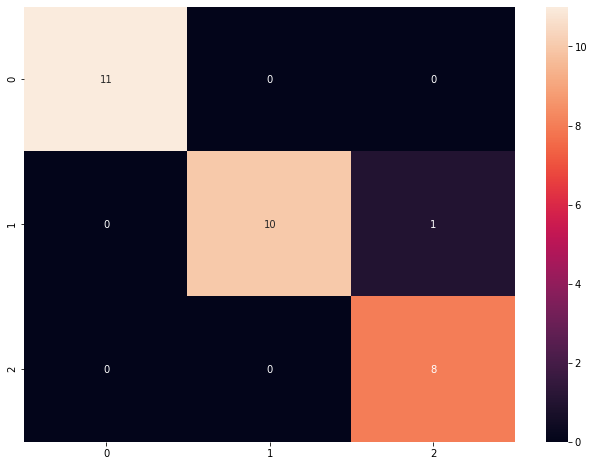

In [33]:
matrix_graph(confusion_matrix, myknn.unique_classes)

We can additionally produce a report containing the precision, recall and f-1 scores for our results per class by making use of the _report_ method of our KNN implementation.

In [34]:
help(MyKNN.report)

Help on function report in module __main__:

report(self, actual, predicted)
    Produces a report containing precision, recall and f-1 
    scores per class over a model's predictions.
    
    Parameters
    ----------
    actual: numpy array
        Contains the actual values of the data points.
        
    predicted: numpy array
        Contains the predicted values of the data points.
    
    Raises
    ------
    AssertionError: 
        Arrays must have the same lenght.
    
    Returns
    --------
    conf_matrix: numpy array
        A confusion matrix.



In [35]:
#We produce the report
report = myknn.report(test_iris[:,-1:], predictions)

#We read it as a data frame
pd.DataFrame.from_dict(report)

,class,precision,recall,f-1 score
0,0,1.000000,1.000000,1.000000
1,1,1.000000,0.909091,0.952381
2,2,0.888889,1.000000,0.941176


Finally we can see the overall accuracy of our classifier by using the _accuracy_ method:

In [26]:
help(MyKNN.accuracy)

Help on function accuracy in module __main__:

accuracy(self, actual, predicted)
    Computes the accuracy of a models predictions.
    
    Parameters
    ----------
    actual: numpy array
        Contains the actual values of the data points.
        
    predicted: numpy array
        Contains the predicted values of the data points.
    
    Raises
    ------
    AssertionError: 
        Arrays must have the same lenght.
    
    Returns
    --------
    accuracy: int
        The model's accuracy.



In [36]:
accur = myknn.accuracy(test_iris[:,-1:], predictions)
accur

0.9666666666666667

Now we can further compare our results to those of the _sklearn_ implementation:

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

#Confusion matrix
confusion_matrix(test_iris[:,-1:], sk_pred)

array([[11,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  8]])

In [29]:
#Report
print(classification_report(test_iris[:,-1:], sk_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.91      0.95        11
         2.0       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



As we can see so far, the results of our implementation match to those of sklearn. However, to further evaluate how our development of _KNN_ , _KFolds_ and *model_selection* are 'collaborating' with each other to produce valid outputs, in the following section we will perform a Grid Search. We will explore several combinations of parameters by using k fold cross validation. Tunning a model using cross validation is not best practice and leads to overfitting as test data are part of the optimasation process. In this case though, our scope is to evaluate our implementation of classes( _MyKNN_ ,  _KFolds_ , *model_validation*) and their methods (k_nearest_neighbours, accuracy, conf_matrix, euclidean_distance, manhattan_distance) against sklearn. Getting the same results with sklearn will give us the reassurance that our objects and their components are working properly. 

Later in this notebook we will tune our models by using nested cross validation.

We start by defining the parameters to be tested by our algorithm.

In [38]:
hyperparameter_grid={'n_neighbors': list(range(1, 11)),
                     'metric': ['euclidean', 'manhattan']}

Then, we perform 5 'experiments' (of 5 fold validation) using random seeds between 1 and 100 each time to train our algorithm and return the best parameter selected.

In [39]:
all_scores_evaluated = [] # a list to store all the parameters evaluated
for inx_exp, i in enumerate(np.random.RandomState(seed = mySeed).randint(1, 100, 5)):
    print ('EXPERIMENT: ', inx_exp+1)
    knn = MyKNN()
    CV = KFolds(5, i)
    validation = model_selection(knn)
    validation.Grid_Search(X , y, hyperparameter_grid, cv=CV)
    all_scores_evaluated.append(validation.parameters_performance)
    print (validation.best_score_params)

EXPERIMENT:  1
{'n_neighbors': 6, 'metric': 'euclidean', 'best_average_score': 0.9800000000000001}
EXPERIMENT:  2
{'n_neighbors': 7, 'metric': 'euclidean', 'best_average_score': 0.9866666666666667}
EXPERIMENT:  3
{'n_neighbors': 3, 'metric': 'euclidean', 'best_average_score': 0.9733333333333334}
EXPERIMENT:  4
{'n_neighbors': 9, 'metric': 'euclidean', 'best_average_score': 0.9733333333333334}
EXPERIMENT:  5
{'n_neighbors': 5, 'metric': 'euclidean', 'best_average_score': 0.9800000000000001}


In our implementation, as one can see from the code above, the user is able to store all the combinations of parameters evaluated for the selection along with their respective scores by using the *parameters_performance* attribute of our method.

In [40]:
# e.g the parameters evaluated for the first 'experiment' will be
all_scores_evaluated[0]

[{'Inner fold': 1, 'n_neighbors': 1, 'metric': 'euclidean', 'score': 0.9},
 {'Inner fold': 2,
  'n_neighbors': 1,
  'metric': 'euclidean',
  'score': 0.9666666666666667},
 {'Inner fold': 3, 'n_neighbors': 1, 'metric': 'euclidean', 'score': 1.0},
 {'Inner fold': 4,
  'n_neighbors': 1,
  'metric': 'euclidean',
  'score': 0.9666666666666667},
 {'Inner fold': 5,
  'n_neighbors': 1,
  'metric': 'euclidean',
  'score': 0.9666666666666667},
 {'Inner fold': 1, 'n_neighbors': 2, 'metric': 'euclidean', 'score': 0.9},
 {'Inner fold': 2,
  'n_neighbors': 2,
  'metric': 'euclidean',
  'score': 0.9333333333333333},
 {'Inner fold': 3,
  'n_neighbors': 2,
  'metric': 'euclidean',
  'score': 0.9666666666666667},
 {'Inner fold': 4,
  'n_neighbors': 2,
  'metric': 'euclidean',
  'score': 0.9333333333333333},
 {'Inner fold': 5,
  'n_neighbors': 2,
  'metric': 'euclidean',
  'score': 0.9666666666666667},
 {'Inner fold': 1,
  'n_neighbors': 3,
  'metric': 'euclidean',
  'score': 0.9333333333333333},
 {'Inne

We continue with the _sklearn_ implementation using the same random seeds to compare our results.

### sklearn 

In [41]:
from sklearn.model_selection import GridSearchCV, KFold

for inx_exp, i in enumerate(np.random.RandomState(seed = mySeed).randint(1, 100, 5)):
    
    print ('EXPERIMENT: ', inx_exp+1)
    
    # Create new a knn model
    knn = KNeighborsClassifier()

    # Use gridsearch to test all values for n_neighbors
    CV = KFold(n_splits=5, shuffle=True, random_state=i)
   
    # CV2 = KFold(n_splits=5, shuffle=True, random_state=1234)
    knn_gscv = GridSearchCV(knn, hyperparameter_grid, cv=CV)
    
    # Fit model to data
    knn_gscv.fit(X, y)
    
    print (knn_gscv.best_params_, 'score: ', knn_gscv.best_score_)

EXPERIMENT:  1
{'metric': 'euclidean', 'n_neighbors': 6} score:  0.9800000000000001
EXPERIMENT:  2
{'metric': 'euclidean', 'n_neighbors': 7} score:  0.9866666666666667
EXPERIMENT:  3
{'metric': 'euclidean', 'n_neighbors': 3} score:  0.9733333333333334
EXPERIMENT:  4
{'metric': 'euclidean', 'n_neighbors': 9} score:  0.9733333333333334
EXPERIMENT:  5
{'metric': 'euclidean', 'n_neighbors': 5} score:  0.9800000000000001


As we can see the results are identical to those that came from our implementation.


## 4. Nested Cross-validation using your implementation of KNN

In the cell below, we develop our own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Our code for nested cross-validation should invoke your kNN function (see above). Our cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is our data matrix (containing all samples and features for each sample), 5 is the number of folds, y are our known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate our results.

**Notes:** 
- We perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- We implement/validate **at least** two distance functions
- We evaluate number of neighbours from 1 to 10
- Our function should return a list of accuracies per fold
- for each **fold**, our function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


#### Answer:

In [34]:
# my nested_cross_val 

help(model_selection.nested_cross_val)

Help on function nested_cross_val in module __main__:

nested_cross_val(self, data, classes, h_parameters, outer_cv, inner_cv)
    Perfoms a model nested cross validation of n producing validation and test folds within
    the outer folds. The agorithm validated the inner folds with all the combinations in the
    parameters grid.
    
    Parameters
    ----------
    data: numpy array
        Contains all the data points.
        
    classes: numpy array
        Contains all the classes corresponding to the data points.
    
    h_parameters: dictionary
        Contains the values of parameters to be validated.
        
    outer_cv: class
        Performs the data folding for the outer loop of the nested cross validation.
        
    inner_cv: class
        Performs the data folding for the inner loop of the nested cross validation.



In [35]:
# my KFolds 

help(KFolds)

Help on class KFolds in module __main__:

class KFolds(builtins.object)
 |  KFolds(n_folds=None, random_state=None)
 |  
 |  An object to implement k folds of numpy arrays
 |  
 |  ...
 |  
 |  Attributes
 |  -----------
 |  n_folds : int
 |      Defines the number of neighbours to be used in KNN (default 3).
 |  
 |  random_state : int
 |      Initiates a permutation seed for reproducibility purposes (default 42).
 |  
 |      
 |  Methods
 |  -----------
 |  split(data)
 |      Splits the input numpy array into the requested number of folds.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, n_folds=None, random_state=None)
 |      Parameters
 |      -----------
 |      n_folds : int
 |          Defines the number of neighbours to be used in KNN (default 3).
 |      
 |      random_state : int
 |          Initites a permutation seed for reproducibility purposes (default 42).
 |  
 |  split(self, data)
 |      Splits the input numpy array into the requested number of folds.
 |    

We first define our hyper-parameter grid of which all combinations will be used to tune our classifier with nested cross validation:

In [36]:
hyperparameter_grid={'n_neighbors': list(range(1, 11)),
                     'metric': ['euclidean', 'manhattan']}

#### Clean data

We then initiate our KNN classifier and consequently define the folds of our preference for tunning and validation. Next, we initiate our *model_selection* class with the model of our preference (KNN in this case) and finally we use the *nested_cross_val* method to produce our results.

In [37]:
# Initiate our implementation of KNN
knn = MyKNN()
# Outer folds for validation
CV  = KFolds(5, mySeed)
# Inner folds for tunning
CV2 = KFolds(5, mySeed)
# We initiate model selection with our model of preference
validation_clean = model_selection(knn)
# We perform nested cross validation
validation_clean.nested_cross_val(X , y, hyperparameter_grid, CV, CV2)

Nested cross validation was completed. 
  
Number of folds for validation:  5 
 
 Number of inner folds for parameter tunning:  5 
 
 All combination of the following parameters were tested for tunning. 
  Number of neighbors:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
 Distance:  ['euclidean', 'manhattan']


The accuracy per distinct set of parameters accross all the validation (inner) folds is stored in the *validation_param_scores* of our method. As we can see the following list contains all the scores for all 5 folds.

In [38]:
validation_clean.validation_param_scores

[{'Fold 1': [{'Inner fold': 1,
    'n_neighbors': 1,
    'metric': 'euclidean',
    'score': 0.9583333333333334},
   {'Inner fold': 2, 'n_neighbors': 1, 'metric': 'euclidean', 'score': 1.0},
   {'Inner fold': 3, 'n_neighbors': 1, 'metric': 'euclidean', 'score': 1.0},
   {'Inner fold': 4,
    'n_neighbors': 1,
    'metric': 'euclidean',
    'score': 0.9583333333333334},
   {'Inner fold': 5,
    'n_neighbors': 1,
    'metric': 'euclidean',
    'score': 0.9166666666666666},
   {'Inner fold': 1,
    'n_neighbors': 2,
    'metric': 'euclidean',
    'score': 0.9166666666666666},
   {'Inner fold': 2, 'n_neighbors': 2, 'metric': 'euclidean', 'score': 1.0},
   {'Inner fold': 3, 'n_neighbors': 2, 'metric': 'euclidean', 'score': 1.0},
   {'Inner fold': 4,
    'n_neighbors': 2,
    'metric': 'euclidean',
    'score': 0.9166666666666666},
   {'Inner fold': 5,
    'n_neighbors': 2,
    'metric': 'euclidean',
    'score': 0.9166666666666666},
   {'Inner fold': 1,
    'n_neighbors': 3,
    'metric': '

For example, the parameters combinations and their respective accuracies over the validation folds for the first testing fold are accessible in the following way:

In [39]:
# The parameters and the scores for the 1st fold
validation_clean.validation_param_scores[0]

{'Fold 1': [{'Inner fold': 1,
   'n_neighbors': 1,
   'metric': 'euclidean',
   'score': 0.9583333333333334},
  {'Inner fold': 2, 'n_neighbors': 1, 'metric': 'euclidean', 'score': 1.0},
  {'Inner fold': 3, 'n_neighbors': 1, 'metric': 'euclidean', 'score': 1.0},
  {'Inner fold': 4,
   'n_neighbors': 1,
   'metric': 'euclidean',
   'score': 0.9583333333333334},
  {'Inner fold': 5,
   'n_neighbors': 1,
   'metric': 'euclidean',
   'score': 0.9166666666666666},
  {'Inner fold': 1,
   'n_neighbors': 2,
   'metric': 'euclidean',
   'score': 0.9166666666666666},
  {'Inner fold': 2, 'n_neighbors': 2, 'metric': 'euclidean', 'score': 1.0},
  {'Inner fold': 3, 'n_neighbors': 2, 'metric': 'euclidean', 'score': 1.0},
  {'Inner fold': 4,
   'n_neighbors': 2,
   'metric': 'euclidean',
   'score': 0.9166666666666666},
  {'Inner fold': 5,
   'n_neighbors': 2,
   'metric': 'euclidean',
   'score': 0.9166666666666666},
  {'Inner fold': 1,
   'n_neighbors': 3,
   'metric': 'euclidean',
   'score': 0.95833

The best set of parameters returned by our nested validation implementation for each fold can be accesed by the *validation_param_best_scores* attribute of our class.

In [40]:
validation_clean.validation_param_best_scores

[{'Fold 1': {'n_neighbors': 3,
   'metric': 'euclidean',
   'best_average_score': 0.975}},
 {'Fold 2': {'n_neighbors': 3,
   'metric': 'euclidean',
   'best_average_score': 0.9833333333333334}},
 {'Fold 3': {'n_neighbors': 9,
   'metric': 'manhattan',
   'best_average_score': 0.9666666666666668}},
 {'Fold 4': {'n_neighbors': 3,
   'metric': 'euclidean',
   'best_average_score': 0.9416666666666668}},
 {'Fold 5': {'n_neighbors': 10,
   'metric': 'manhattan',
   'best_average_score': 0.9666666666666666}}]

Finally, the confusion matrices on how the selected parameters performed for each fold (on the testing set) are stored and can be accesed by the *matrices_per_fold* attribute.

In [41]:
validation_clean.matrices_per_fold

[{'Fold 1': array([[11.,  0.,  0.],
         [ 0., 10.,  1.],
         [ 0.,  0.,  8.]])},
 {'Fold 2': array([[12.,  0.,  0.],
         [ 0., 11.,  0.],
         [ 0.,  2.,  5.]])},
 {'Fold 3': array([[ 5.,  0.,  0.],
         [ 0., 13.,  1.],
         [ 0.,  1., 10.]])},
 {'Fold 4': array([[11.,  0.,  0.],
         [ 0.,  7.,  0.],
         [ 0.,  0., 12.]])},
 {'Fold 5': array([[11.,  0.,  0.],
         [ 0.,  6.,  1.],
         [ 0.,  1., 11.]])}]

For example, the confusion matrix of how the best validation parameters are performing on the 3rd test fold can be presented as follows (here we make use of the *matrix_graph* function we defined before).

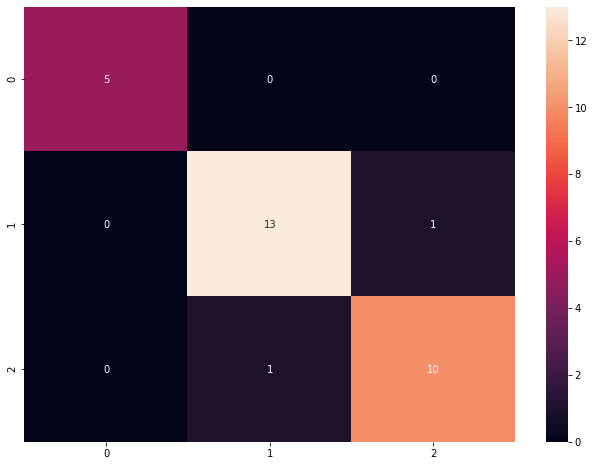

In [42]:
matrix_graph(validation_clean.matrices_per_fold[2]['Fold 3'], knn.unique_classes)

Finally, by using our implementation's *reports_per_fold* attribute we can access the reports for each fold containing information on the precision, recall and f-1 of how our selected combination of parameters performed in each test fold.

In [43]:
validation_clean.reports_per_fold

[{'Fold 1': {'class': [0, 1, 2],
   'precision': [1.0, 1.0, 0.8888888888888888],
   'recall': [1.0, 0.9090909090909091, 1.0],
   'f-1 score': [1.0, 0.9523809523809523, 0.9411764705882353]}},
 {'Fold 2': {'class': [0, 1, 2],
   'precision': [1.0, 0.8461538461538461, 1.0],
   'recall': [1.0, 1.0, 0.7142857142857143],
   'f-1 score': [1.0, 0.9166666666666666, 0.8333333333333333]}},
 {'Fold 3': {'class': [0, 1, 2],
   'precision': [1.0, 0.9285714285714286, 0.9090909090909091],
   'recall': [1.0, 0.9285714285714286, 0.9090909090909091],
   'f-1 score': [1.0, 0.9285714285714286, 0.9090909090909091]}},
 {'Fold 4': {'class': [0, 1, 2],
   'precision': [1.0, 1.0, 1.0],
   'recall': [1.0, 1.0, 1.0],
   'f-1 score': [1.0, 1.0, 1.0]}},
 {'Fold 5': {'class': [0, 1, 2],
   'precision': [1.0, 0.8571428571428571, 0.9166666666666666],
   'recall': [1.0, 0.8571428571428571, 0.9166666666666666],
   'f-1 score': [1.0, 0.8571428571428571, 0.9166666666666666]}}]

For example, the report for the 4th fold will be:

In [44]:
pd.DataFrame.from_dict(validation_clean.reports_per_fold[2]['Fold 3'])

,class,precision,recall,f-1 score
0,0,1.000000,1.000000,1.000000
1,1,0.928571,0.928571,0.928571
2,2,0.909091,0.909091,0.909091


The accuracy score for each fold by using the respective selected combination set of paraters will be displayed in the summary table in the following section.

#### Noisy data

We can now apply the same process on the noisy data set:

In [45]:
# evaluate noisy  data code
knn = MyKNN()
CV3  = KFolds(5, mySeed)
CV2 = KFolds(5, mySeed)
validation_noisy = model_selection(knn)
validation_noisy.nested_cross_val(XN , y, hyperparameter_grid, CV3, CV2)

Nested cross validation was completed. 
  
Number of folds for validation:  5 
 
 Number of inner folds for parameter tunning:  5 
 
 All combination of the following parameters were tested for tunning. 
  Number of neighbors:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
 Distance:  ['euclidean', 'manhattan']


The accuracy per distinct set of parameters accross all the validation (inner) folds is:

In [46]:
validation_noisy.validation_param_scores

[{'Fold 1': [{'Inner fold': 1,
    'n_neighbors': 1,
    'metric': 'euclidean',
    'score': 0.8333333333333334},
   {'Inner fold': 2,
    'n_neighbors': 1,
    'metric': 'euclidean',
    'score': 0.7916666666666666},
   {'Inner fold': 3,
    'n_neighbors': 1,
    'metric': 'euclidean',
    'score': 0.8333333333333334},
   {'Inner fold': 4,
    'n_neighbors': 1,
    'metric': 'euclidean',
    'score': 0.7083333333333334},
   {'Inner fold': 5, 'n_neighbors': 1, 'metric': 'euclidean', 'score': 0.875},
   {'Inner fold': 1,
    'n_neighbors': 2,
    'metric': 'euclidean',
    'score': 0.8333333333333334},
   {'Inner fold': 2,
    'n_neighbors': 2,
    'metric': 'euclidean',
    'score': 0.7916666666666666},
   {'Inner fold': 3,
    'n_neighbors': 2,
    'metric': 'euclidean',
    'score': 0.8333333333333334},
   {'Inner fold': 4, 'n_neighbors': 2, 'metric': 'euclidean', 'score': 0.75},
   {'Inner fold': 5, 'n_neighbors': 2, 'metric': 'euclidean', 'score': 0.875},
   {'Inner fold': 1, 'n_ne

The best set of parameters returned by the nested validation implementation are:

In [47]:
validation_noisy.validation_param_best_scores

[{'Fold 1': {'n_neighbors': 5,
   'metric': 'euclidean',
   'best_average_score': 0.8916666666666666}},
 {'Fold 2': {'n_neighbors': 8,
   'metric': 'manhattan',
   'best_average_score': 0.9}},
 {'Fold 3': {'n_neighbors': 8,
   'metric': 'euclidean',
   'best_average_score': 0.8916666666666666}},
 {'Fold 4': {'n_neighbors': 10,
   'metric': 'euclidean',
   'best_average_score': 0.8666666666666668}},
 {'Fold 5': {'n_neighbors': 10,
   'metric': 'euclidean',
   'best_average_score': 0.875}}]

The confusion matrices on how the selected parameters performed for each fold are below:

In [48]:
validation_noisy.matrices_per_fold

[{'Fold 1': array([[11.,  0.,  0.],
         [ 0.,  8.,  3.],
         [ 0.,  3.,  5.]])},
 {'Fold 2': array([[12.,  0.,  0.],
         [ 0., 10.,  1.],
         [ 0.,  3.,  4.]])},
 {'Fold 3': array([[ 5.,  0.,  0.],
         [ 0., 11.,  3.],
         [ 0.,  2.,  9.]])},
 {'Fold 4': array([[11.,  0.,  0.],
         [ 0.,  6.,  1.],
         [ 0.,  1., 11.]])},
 {'Fold 5': array([[11.,  0.,  0.],
         [ 0.,  7.,  0.],
         [ 0.,  4.,  8.]])}]

Finally, the reports for each fold containing information on the precision, recall and f-1 of how our selected combination of parameters performed in each test fold are below:

In [49]:
validation_noisy.reports_per_fold

[{'Fold 1': {'class': [0, 1, 2],
   'precision': [1.0, 0.7272727272727273, 0.625],
   'recall': [1.0, 0.7272727272727273, 0.625],
   'f-1 score': [1.0, 0.7272727272727273, 0.625]}},
 {'Fold 2': {'class': [0, 1, 2],
   'precision': [1.0, 0.7692307692307693, 0.8],
   'recall': [1.0, 0.9090909090909091, 0.5714285714285714],
   'f-1 score': [1.0, 0.8333333333333333, 0.6666666666666666]}},
 {'Fold 3': {'class': [0, 1, 2],
   'precision': [1.0, 0.8461538461538461, 0.75],
   'recall': [1.0, 0.7857142857142857, 0.8181818181818182],
   'f-1 score': [1.0, 0.8148148148148148, 0.7826086956521738]}},
 {'Fold 4': {'class': [0, 1, 2],
   'precision': [1.0, 0.8571428571428571, 0.9166666666666666],
   'recall': [1.0, 0.8571428571428571, 0.9166666666666666],
   'f-1 score': [1.0, 0.8571428571428571, 0.9166666666666666]}},
 {'Fold 5': {'class': [0, 1, 2],
   'precision': [1.0, 0.6363636363636364, 1.0],
   'recall': [1.0, 1.0, 0.6666666666666666],
   'f-1 score': [1.0, 0.7777777777777778, 0.8]}}]

### Comparison against sklearn implementation

In the following section we perform a nested vs non nested cv in paralles to sklearn to see if our implementation gives reasonable results.

#### sklearn implementation

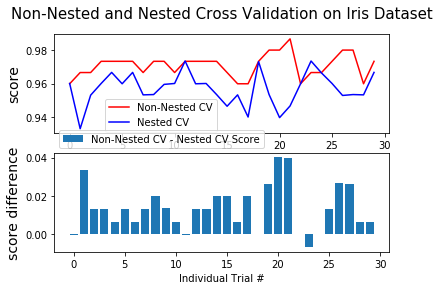

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold


# Number of random trials
NUM_TRIALS = 30

# KNN classifier
sk_knn = KNeighborsClassifier()

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=sk_knn, param_grid=hyperparameter_grid, cv=inner_cv,)
    clf.fit(X, y)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

#### Our implementation

In [51]:
NUM_TRIALS = 30

our_non_nested = []
our_nested = []

for inx_exp, i in enumerate(range(NUM_TRIALS)):
    print ('EXPERIMENT: ', inx_exp+1)
    
    print ('\n Non nested')
    knn = MyKNN()
    CV = KFolds(5, i)
    validation = model_selection(knn)
    validation.Grid_Search(X , y, hyperparameter_grid, cv=CV)
    all_scores_evaluated.append(validation.parameters_performance)
    our_non_nested.append(validation.best_score_params['best_average_score'])

    print ('\n Nested')
    
    
    # Initiate our implementation of KNN
    knn = MyKNN()
    # Outer folds for validation
    CV3  = KFolds(5, i)
    # Inner folds for tunning
    CV2 = KFolds(5, i)
    # We initiate model selection with our model of preference
    validation_clean = model_selection(knn)
    # We perform nested cross validation
    validation_clean.nested_cross_val(X , y, hyperparameter_grid, CV3, CV2)
    our_nested.append(validation_clean.scores_mean)


EXPERIMENT:  1

 Non nested

 Nested
Nested cross validation was completed. 
  
Number of folds for validation:  5 
 
 Number of inner folds for parameter tunning:  5 
 
 All combination of the following parameters were tested for tunning. 
  Number of neighbors:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
 Distance:  ['euclidean', 'manhattan']
EXPERIMENT:  2

 Non nested

 Nested
Nested cross validation was completed. 
  
Number of folds for validation:  5 
 
 Number of inner folds for parameter tunning:  5 
 
 All combination of the following parameters were tested for tunning. 
  Number of neighbors:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
 Distance:  ['euclidean', 'manhattan']
EXPERIMENT:  3

 Non nested

 Nested
Nested cross validation was completed. 
  
Number of folds for validation:  5 
 
 Number of inner folds for parameter tunning:  5 
 
 All combination of the following parameters were tested for tunning. 
  Number of neighbors:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
 Distance:  ['euclidean', 'm

In [52]:
our_difference = np.array(our_non_nested) - np.array(our_nested)

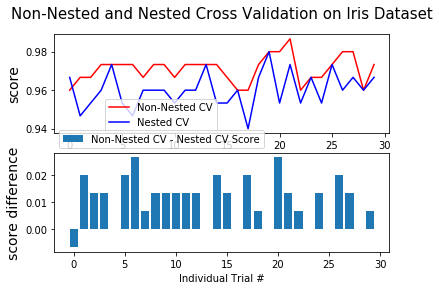

In [53]:
# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(our_non_nested, color='r')
nested_line, = plt.plot(our_nested, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), our_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

As we can see the scores for the non nested cv are identical to the sklearn ones. The nested cv gives slightly different results but still very reasonable. This could be due to some methodological differences in the implementation.

## 5. Summary of results 

Using our results from above, we will fill out the following tables using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

We will alson now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |


#### Answer:

### Clean Data

To produce a summary table for the clean data we can use our *summary_table* attribute from our implementation.

In [54]:
validation_clean.summary_table

,Fold,accuracy,k,distance
0,1.000000,0.900000,3,euclidean
1,2.000000,1.000000,9,euclidean
2,3.000000,0.966667,7,euclidean
3,4.000000,0.966667,3,euclidean
4,5.000000,1.000000,5,euclidean
5,0.966667,0.036515,-,-


### Noisy Data

Repeating the same process for the noisy data we have:

In [55]:
validation_noisy.summary_table

,Fold,accuracy,k,distance
0,1.00,0.800000,5,euclidean
1,2.00,0.866667,8,manhattan
2,3.00,0.833333,8,euclidean
3,4.00,0.933333,10,euclidean
4,5.00,0.866667,10,euclidean
5,0.86,0.044222,-,-


We can further interpret how our classifier performs on the clean versus the noisy data by plotting their average accuracies over a number of experiments.

In [56]:
clean_scores = []
noisy_scores = []

for inx_exp, i in enumerate(np.random.RandomState(seed = mySeed).randint(1, 100, 30)):
    print ('\n EXPERIMENT: ', inx_exp+1)
    
    print ('\n Clean data')
    
    knn = MyKNN()
    CV3  = KFolds(5, i)
    CV2 = KFolds(5, i)
    validation_clean = model_selection(knn)
    validation_clean.nested_cross_val(X , y, hyperparameter_grid, CV3, CV2)
    clean_scores.append(validation_clean.scores_mean)
    
    print ('\n Noisy data')
    
    knn = MyKNN()
    validation_noisy = model_selection(knn)
    validation_noisy.nested_cross_val(XN , y, hyperparameter_grid, CV3, CV2)
    noisy_scores.append(validation_noisy.scores_mean)


 EXPERIMENT:  1

 Clean data
Nested cross validation was completed. 
  
Number of folds for validation:  5 
 
 Number of inner folds for parameter tunning:  5 
 
 All combination of the following parameters were tested for tunning. 
  Number of neighbors:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
 Distance:  ['euclidean', 'manhattan']

 Noisy data
Nested cross validation was completed. 
  
Number of folds for validation:  5 
 
 Number of inner folds for parameter tunning:  5 
 
 All combination of the following parameters were tested for tunning. 
  Number of neighbors:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
 Distance:  ['euclidean', 'manhattan']

 EXPERIMENT:  2

 Clean data
Nested cross validation was completed. 
  
Number of folds for validation:  5 
 
 Number of inner folds for parameter tunning:  5 
 
 All combination of the following parameters were tested for tunning. 
  Number of neighbors:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
 Distance:  ['euclidean', 'manhattan']

 Noisy data
Nested cross v

Text(0.5, 1.1, 'Clean and Noisy data nested Cross Validation on Iris Dataset')

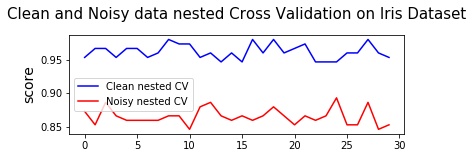

In [57]:
# Plot average scores on each trial for clean and noisy data nested cross validation

# The code for the graph layout is taken from the sklean documentation site 
# for comparing nested vs non nested cv
plt.figure()
plt.subplot(211)
clear_scores_line, = plt.plot(clean_scores, color='b')
noisy_line, = plt.plot(noisy_scores, color='r')
plt.ylabel("score", fontsize="14")
plt.legend([clear_scores_line, noisy_line],
           ["Clean nested CV", "Noisy nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Clean and Noisy data nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")

As expected our KNNn implementation prerfoms better on the 'clean' dataset. 

### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want to show class-relative precision and recall. 


#### Answer: 


To produce a summary confusion matrix for our results we use the ```matrices_per_fold``` attribute of our ```nested_cross_val``` class.

We summarise and plot the matrices of the folds:

In [58]:
summary_clean_matrix = (sum([validation_clean.matrices_per_fold[indx][f'Fold {indx+1}']for indx, i 
                             in enumerate(validation_clean.matrices_per_fold)]))

In [59]:
summary_clean_matrix

array([[50.,  0.,  0.],
       [ 0., 47.,  3.],
       [ 0.,  4., 46.]])

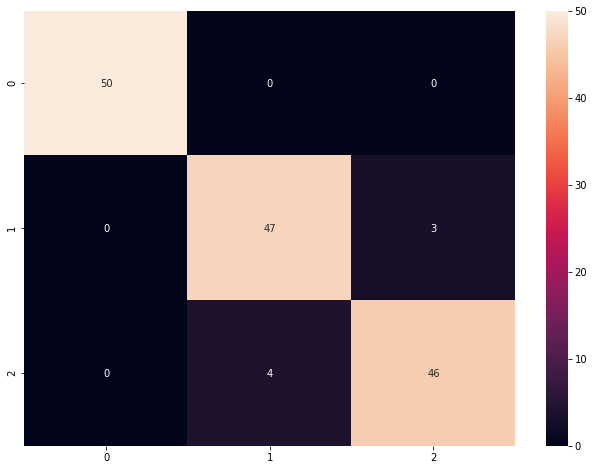

In [60]:
matrix_graph(summary_clean_matrix, knn.unique_classes)

To produce summary reports we summarise the predictions of our algorithms over the 5 folds (given by the ```actual``` attribute in our implementation) and we use them as an input to the ```report``` method.

In [62]:
import itertools

summary_of_clean_predictions = ([validation_clean.predicted[indx][f'Fold {indx+1}']for indx, i 
                                 in enumerate(validation_clean.predicted)])

summary_of_clean_predictions = np.array((list(itertools.chain.from_iterable(summary_of_clean_predictions))))

In [63]:
summary_of_clean_actual = ([validation_clean.actual[indx][f'Fold {indx+1}']for indx, i 
                                 in enumerate(validation_clean.actual)])

summary_of_clean_actual = np.array((list(itertools.chain.from_iterable(summary_of_clean_actual))))

In [64]:
summary_report_clean = (pd.DataFrame.
                        from_dict(MyKNN().report(summary_of_clean_actual, summary_of_clean_predictions)))

In [65]:
summary_report_clean

,class,precision,recall,f-1 score
0,0,1.000000,1.00,1.000000
1,1,0.921569,0.94,0.930693
2,2,0.938776,0.92,0.929293


Similarly, for the noisy data:

In [66]:
summary_noisy_matrix = (sum([validation_noisy.matrices_per_fold[indx][f'Fold {indx+1}']for indx, i 
                             in enumerate(validation_noisy.matrices_per_fold)]))

In [67]:
summary_noisy_matrix

array([[50.,  0.,  0.],
       [ 0., 39., 11.],
       [ 0., 11., 39.]])

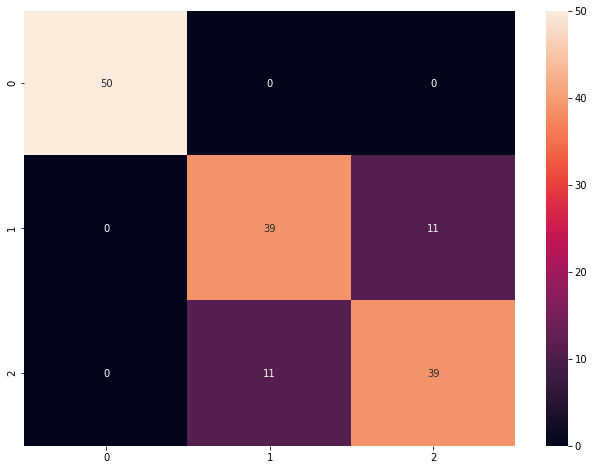

In [68]:
matrix_graph(summary_noisy_matrix, knn.unique_classes)

In [69]:
summary_of_noisy_predictions = ([validation_noisy.predicted[indx][f'Fold {indx+1}']for indx, i 
                                 in enumerate(validation_noisy.predicted)])

summary_of_noisy_predictions = np.array((list(itertools.chain.from_iterable(summary_of_noisy_predictions))))

In [70]:
summary_of_noisy_actual = ([validation_noisy.actual[indx][f'Fold {indx+1}']for indx, i 
                                 in enumerate(validation_noisy.actual)])

summary_of_noisy_actual = np.array((list(itertools.chain.from_iterable(summary_of_noisy_actual))))

In [71]:
summary_report_noisy = (pd.DataFrame.
                        from_dict(MyKNN().report(summary_of_noisy_actual, summary_of_noisy_predictions)))

In [72]:
summary_report_noisy

,class,precision,recall,f-1 score
0,0,1.00,1.00,1.00
1,1,0.78,0.78,0.78
2,2,0.78,0.78,0.78


As we can see from the report  and the confusion matrix of the noisy data, the KNN algorithm predicts with high accuracy 'setosa' but it does not perform very well distinguishing 'versicolor' and 'virginica'. That comes as expected since when we produced the scatter-plot matrix as part of our exploratory analysis, the latter two species had quite an overlap. While the 'versicolor' and 'virginica' points are overlapping to the extent that it's  difficult for the algorithm to classify them correctly, 'setosa' seems to form a better defined cluster.

## 6. Overall


## Exploratory data analysis 


When looking at the scatter-plots of the 'clean' data we can see that there is a clear separation of the data points and the clusters are distinct. Setosa lies further away from virginica and versicolor, with the latter two overlapping slightly but still forming two well defined clusters. The KNN algorithm is expected to perform well with this dataset in terms of accuracy and precision i.e., identification of the true positive and true negative cases.

When Gaussian noise is added to the data, we observe much more overlap between the three species. Setosa still lies away from the other two species in half of the individual scatter-plots, however separation is less obvious when using the noisy data. The clustering is generally not as clear as with the 'clean' data, hence we expect the KNN algorithm to be less accurate and precise and to have a higher recall rate when using the data that contains noise. 

### Choice of parameters




The choice of parameters changes per fold depending on the underlying grid search being used.

Generally, when the model complexity increases (more neighbors are being used), the accuracy when tunning the model tends to increase too.
This is does not necessarily reflect to when we test the models using unseen data. 
Usually, one needs to find a sweet spot between over- and under-fitting to achieve a good accuracy score when performing predictions on unseen data. 




### Clean vs. noisy


The best parameter choice changes between the two datasets. If we compare the parameter selection for the two datasets, we can see that the algorithm tends to select models with higher complexity (higher number of neighbours) when it's ran on the noisy data to achieve higher accuracy. This is as expected since the data are more 'disturbed' and the model tries to adjust for that complexity in order to perform better. In order to classify each data point, the algorithm has to look at more neighbours to identify to which class the point belongs. On the other hand side, when we run our knn on the clean data where the classes are more easily identifiable and separation is clarer, the algorithm tends to select fewer neighbours as the best option. 

With regards to the best distance metric chosen, we see in our implementation that for the noisy data euclidean is chosen in most of the folds. In the clean data there does not seem to be a pattern.

Bibliography suggests that euclidean and manhattan perform similarly when introducing noise to the data. Generally thought, due to the 'curse of dimensionality', the manhattan distance might perform better in high-dimensional data since it does not favour distant neighbours. According to the 'curse of dimensionality', high-dimensional data (with for instance more than 20 features) can become quite sparse so that even the nearest neighbour can still be quite far which can possibly lead to loss of information. In our case the dataset has only 4 dimensions.

### Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

In our implementation the class selection is happening arbitarily. The class is selected from a list that stores the number of accuracies in descending order and the first class in the list with the highest number of occurancies is selected.

There are several ways of tackling this issue. One could increase or decrease the number of neighbours to resolve the tie when it occurs. Another way would be to assign the class of the closest neighbour of the point. 

To break the tie if it occurs, we could consider to calculate the sum of the distances of the individual classes and assign to the point the one with the smallest value. To avoid though cases when one distant point biases our class assignment, we could apply a weighted distance rule. Then we could again measure those weighted distances and assign the class that comes with the smallest value.

The weight applied could be of the form:

$w(d)= \frac{1}{d^p}$

Where:

$d$: The distance between two points (Euclidean of Manhattan)

$p$ : A parameter defined by the user that controls the importance of the distance. When $p$ increases, distant points contribute less to the sum of the distance of a class (always $p > 0$).

**pseudocode:**

- for point $x$:
    - if number of neighbours classified as $1$ are equal to the number of neighbours classified as $2$:
        - calculate the sum of $w(d)$ from $x$ to the nearest neighbours of class $1$
        - calculate the sum of $w(d)$ from $x$ to the nearest neighbours of class $2$
    - assign to $x$ the class with the smallest sum of $w(d)$s:


### Beyond Iris 


In terms of code:

The code could be developed in a more general way to cope for example with several data types. It could furthermore be developed more flexibly with separated and decicated classes and functions.

Optimisation could be one of the areas of development as well, especially since our implementation of nested cross validation is computationally expensive. The implementation is already slow when running multiple inner loops so that would need to be optimised to perform efficiently when used for larger datasets.

Another area for improvement would be for the knn algorithm to raise meaningful errors to the user at a larger extent (only a few functions are doing it in the current implementation).

The nested cross validation could also be further developed in a way to better interact with other algorithms (as well as the knn algorithm) and accept classes of other format. 


In terms of statistics:

Scaling, normalisation and more statistical metrics features such as more distance functions and more summary statistics are some of the features that could furthermore be added to enhance our knn algorithm.


## References

### Books & Web sites visited

[Nested cross validation explained](https://weina.me/nested-cross-validation/)

[Hands-On
Machine Learning
with Scikit-Learn
& TensorFlow](https://www.lpsm.paris/pageperso/has/source/Hand-on-ML.pdf)

[The Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

[Develop k-Nearest Neighbors in Python From Scratch](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)

[Nested Cross-Validation Python Code](https://mlfromscratch.com/nested-cross-validation-python-code/#/)

[sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

[sklearn: Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)

[
Interpolation: Inverse Distance Weighting](http://www.ncgia.ucsb.edu/pubs/spherekit/inverse.html)

### Academic resources


G. C. Cawley and N. L. C. Talbot, “On Over-fitting in Model Selection and Subsequent Selection Bias in Performance Evaluation,” Journal of Machine Learning Research, vol. 11, no. Jul, pp. 2079–2107, 2010.

H. A. Abu Alfeilate, A. B. A. Hassanate, O. Lasassmehe, A. S. Tarawnehf, M. Bashir Alhasanatg,h, Hamzeh S. Eyal Salmane, “Effects of Distance Measure Choice on KNN Classifier Performance - A Review”
V. B. Surya Prasatha,b,c,d,∗.


T. Hastie, J. Friedman, and R. Tibshirani, “Model Assessment and Selection in The Elements of Statistical Learning: Data Mining, Inference, and Prediction”, T. Hastie, J. Friedman, and R. Tibshirani, Eds. New York, NY: Springer New York, 2001, pp. 193–224.


C. Ambroise and G. J. McLachlan, “Selection bias in gene extraction on the basis of microarray gene-expression data”, Proceedings of the national academy of sciences 99, 10 (2002), 6562 - 6566.


G. C. Cawley and N. LC. Talbot, “On overfitting in model selection and subsequent selection bias in performance evaluation”, Journal of Machine Learning Research 11, Jul (2010), 2079 - 2107.

